In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

##**Load dataset , analyse it and pre process it**

In [2]:
# load dataset
df = pd.read_csv("/content/ionosphere_csv.csv")

In [3]:
df

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
# split into input (X) and output (Y) variables
X = df.drop('class',axis=1).astype(float)
Y = df['class']

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [5]:
X

,a01,a02,a03,a04,a05,a06,a07,a08,a09,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22,a23,a24,a25,a26,a27,a28,a29,a30,a31,a32,a33,a34
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0.0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0.0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0.0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0.0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [6]:
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

##**Without early stopping**

In [7]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
epochs = 500
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0, decay=0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history=model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2)

Epoch 1/500
9/9 - 1s - loss: 0.6696 - accuracy: 0.6170 - val_loss: 0.5984 - val_accuracy: 0.6552
Epoch 2/500
9/9 - 0s - loss: 0.5833 - accuracy: 0.7149 - val_loss: 0.5923 - val_accuracy: 0.6810
Epoch 3/500
9/9 - 0s - loss: 0.5444 - accuracy: 0.7830 - val_loss: 0.5643 - val_accuracy: 0.7069
Epoch 4/500
9/9 - 0s - loss: 0.5053 - accuracy: 0.8000 - val_loss: 0.6149 - val_accuracy: 0.7155
Epoch 5/500
9/9 - 0s - loss: 0.4783 - accuracy: 0.8255 - val_loss: 0.4887 - val_accuracy: 0.7241
Epoch 6/500
9/9 - 0s - loss: 0.4397 - accuracy: 0.8511 - val_loss: 0.4624 - val_accuracy: 0.7586
Epoch 7/500
9/9 - 0s - loss: 0.4102 - accuracy: 0.8723 - val_loss: 0.4241 - val_accuracy: 0.8534
Epoch 8/500
9/9 - 0s - loss: 0.3813 - accuracy: 0.9021 - val_loss: 0.3467 - val_accuracy: 0.9224
Epoch 9/500
9/9 - 0s - loss: 0.3649 - accuracy: 0.8979 - val_loss: 0.3290 - val_accuracy: 0.9397
Epoch 10/500
9/9 - 0s - loss: 0.3415 - accuracy: 0.9106 - val_loss: 0.3692 - val_accuracy: 0.9569
Epoch 11/500
9/9 - 0s - loss:

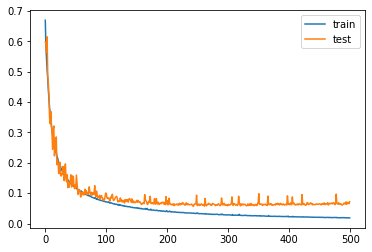

In [10]:
#Plot loss vs epochs

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


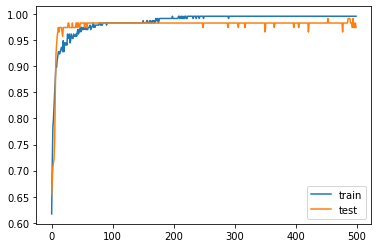

In [11]:
#Plotting accuracy vs epochs

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()


**Well we observe that around 50th epoch itself the validation accuracy saturated. Thus by training it for so long we have not only wasted computational power but also pushed it towards overfitting. One way to solve this issue is to implement Early Stopping.**

##**Apply Early Stopping**

In [12]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [13]:
#Early stopping callback

from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [14]:
epochs = 500
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0, decay=0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history_es=model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=1,callbacks=[es])

Epoch 1/500
9/9 [==============================] - 1s 31ms/step - loss: 0.6120 - accuracy: 0.7196 - val_loss: 0.5394 - val_accuracy: 0.8362
Epoch 2/500
9/9 [==============================] - 0s 6ms/step - loss: 0.5616 - accuracy: 0.7764 - val_loss: 0.5105 - val_accuracy: 0.8362
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.5280 - accuracy: 0.7961 - val_loss: 0.4853 - val_accuracy: 0.8707
Epoch 4/500
9/9 [==============================] - 0s 7ms/step - loss: 0.4874 - accuracy: 0.8321 - val_loss: 0.4315 - val_accuracy: 0.8966
Epoch 5/500
9/9 [==============================] - 0s 7ms/step - loss: 0.4426 - accuracy: 0.8548 - val_loss: 0.3875 - val_accuracy: 0.9483
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 0.4169 - accuracy: 0.8660 - val_loss: 0.3535 - val_accuracy: 0.9483
Epoch 7/500
9/9 [==============================] - 0s 6ms/step - loss: 0.3955 - accuracy: 0.8680 - val_loss: 0.3212 - val_accuracy: 0.9483
Epoch 8/500
9/9 [=========

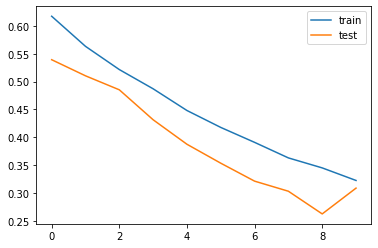

In [15]:
#Plotting loss vs epochs

import matplotlib.pyplot as plt
plt.plot(history_es.history['loss'], label='train')
plt.plot(history_es.history['val_loss'], label='test')
plt.legend()
plt.show()

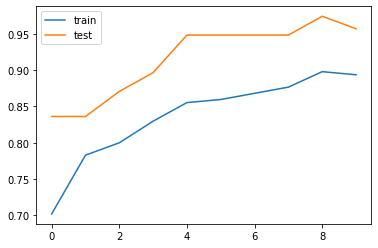

In [16]:
#Plotting accuracy vs epochs

import matplotlib.pyplot as plt

plt.plot(history_es.history['accuracy'], label='train')
plt.plot(history_es.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**Although we implemented early stopping here but our model didn't get to train enough because the moment validation loss increased it stopped training. So this is clearly underfitting. To solve this issue we will introduce some patience so that it atleast wait for that many epochs before stopping the execution.**

In [17]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
#Erly stopping callback with patience
es1 = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

In [19]:
epochs = 500
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0, decay=0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history2=model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2,callbacks=[es1])

Epoch 1/500
9/9 - 1s - loss: 0.5785 - accuracy: 0.7489 - val_loss: 0.5373 - val_accuracy: 0.8276
Epoch 2/500
9/9 - 0s - loss: 0.5168 - accuracy: 0.8128 - val_loss: 0.4488 - val_accuracy: 0.8707
Epoch 3/500
9/9 - 0s - loss: 0.4705 - accuracy: 0.8468 - val_loss: 0.4424 - val_accuracy: 0.8966
Epoch 4/500
9/9 - 0s - loss: 0.4355 - accuracy: 0.8511 - val_loss: 0.4015 - val_accuracy: 0.9052
Epoch 5/500
9/9 - 0s - loss: 0.4061 - accuracy: 0.8681 - val_loss: 0.3647 - val_accuracy: 0.9138
Epoch 6/500
9/9 - 0s - loss: 0.3778 - accuracy: 0.8766 - val_loss: 0.3994 - val_accuracy: 0.9052
Epoch 7/500
9/9 - 0s - loss: 0.3521 - accuracy: 0.8979 - val_loss: 0.3053 - val_accuracy: 0.9224
Epoch 8/500
9/9 - 0s - loss: 0.3325 - accuracy: 0.9021 - val_loss: 0.3014 - val_accuracy: 0.9224
Epoch 9/500
9/9 - 0s - loss: 0.3134 - accuracy: 0.9064 - val_loss: 0.3845 - val_accuracy: 0.9138
Epoch 10/500
9/9 - 0s - loss: 0.2988 - accuracy: 0.9234 - val_loss: 0.3318 - val_accuracy: 0.9397
Epoch 11/500
9/9 - 0s - loss:

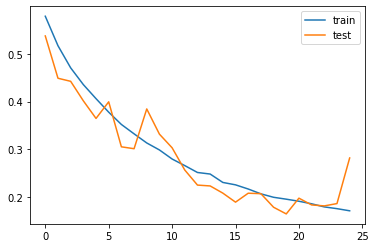

In [20]:
#Plot loss vs epochs

import matplotlib.pyplot as plt

plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

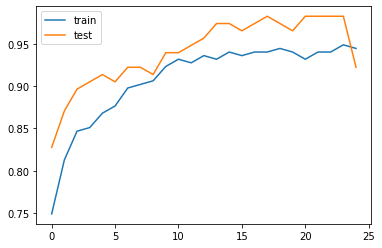

In [21]:
#Plotting accuracy vs epochs

import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**Let's increase the patience and check out if there's any improvement or not.**

In [22]:
# create model
model = Sequential()
model.add(Dense(34, input_dim=34, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
#Early stopping callback with a greater patience
es2 = EarlyStopping(monitor='val_accuracy', patience=25, verbose=1)

In [24]:
epochs = 500
learning_rate = 0.1
sgd = SGD(lr=learning_rate, momentum=0, decay=0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model
history3=model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=28, verbose=2,callbacks=[es2])

Epoch 1/500
9/9 - 1s - loss: 0.7165 - accuracy: 0.5872 - val_loss: 0.4818 - val_accuracy: 0.9483
Epoch 2/500
9/9 - 0s - loss: 0.6399 - accuracy: 0.6553 - val_loss: 0.5091 - val_accuracy: 0.9224
Epoch 3/500
9/9 - 0s - loss: 0.5795 - accuracy: 0.7574 - val_loss: 0.5461 - val_accuracy: 0.8017
Epoch 4/500
9/9 - 0s - loss: 0.5340 - accuracy: 0.8000 - val_loss: 0.4834 - val_accuracy: 0.8707
Epoch 5/500
9/9 - 0s - loss: 0.4995 - accuracy: 0.8085 - val_loss: 0.5405 - val_accuracy: 0.8276
Epoch 6/500
9/9 - 0s - loss: 0.4685 - accuracy: 0.8213 - val_loss: 0.4491 - val_accuracy: 0.9138
Epoch 7/500
9/9 - 0s - loss: 0.4377 - accuracy: 0.8553 - val_loss: 0.4406 - val_accuracy: 0.9224
Epoch 8/500
9/9 - 0s - loss: 0.4109 - accuracy: 0.8553 - val_loss: 0.4499 - val_accuracy: 0.8879
Epoch 9/500
9/9 - 0s - loss: 0.3867 - accuracy: 0.8766 - val_loss: 0.3445 - val_accuracy: 0.9483
Epoch 10/500
9/9 - 0s - loss: 0.3647 - accuracy: 0.8766 - val_loss: 0.3502 - val_accuracy: 0.9397
Epoch 11/500
9/9 - 0s - loss:

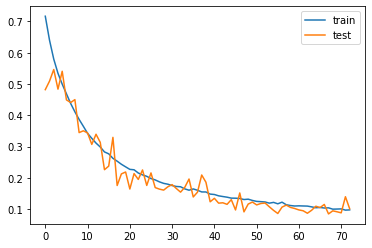

In [25]:
#Plot loss vs epochs

import matplotlib.pyplot as plt

plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()
plt.show()

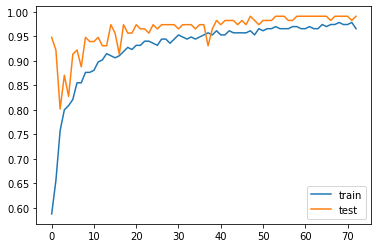

In [26]:
#Plotting accuracy vs epochs

import matplotlib.pyplot as plt

plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.legend()
plt.show()

**Well our model has achieved quite a good accuracy and in quite a less number of epochs.**